# Задача классификаци.Random Forest

In [65]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [66]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          186 non-null    int64  
 1   Growth                       186 non-null    int64  
 2   Shoe size                    186 non-null    int64  
 3   Course number                186 non-null    int64  
 4   Year of birth                186 non-null    int64  
 5   Friend number                186 non-null    int64  
 6   Russian rating               186 non-null    int64  
 7   Maths rating                 186 non-null    int64  
 8   Physics rating               186 non-null    int64  
 9   Computer science rating      186 non-null    int64  
 10  Chemistry rating             186 non-null    int64  
 11  Literature rating            186 non-null    int64  
 12  History rating               186 non-null    int64  
 13  Geography rating    

In [67]:
independent_features = ['Maths rating','Russian rating']
target_feature = ['Sex']

df_cut = df[independent_features + target_feature]
df_cut = df_cut.dropna()
df_cut = df_cut.sample(167)

df_test_cut = df_test[independent_features + target_feature]
df_test_cut = df_test_cut.dropna()

In [68]:
# sns.pairplot(df_cut, hue=target_feature[0])

In [69]:
forest_model = RandomForestClassifier(max_depth=5, random_state=0)
forest_model.fit(df_cut[independent_features].values.reshape(-1, len(independent_features)), y=df_cut[target_feature].values)

<ipython-input-69-93b2eeb6352e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(df_cut[independent_features].values.reshape(-1, len(independent_features)), y=df_cut[target_feature].values)


RandomForestClassifier(max_depth=5, random_state=0)

In [70]:
# Предсказывание конкретного класса
df_test_cut['Predicted'] = forest_model.predict(df_test_cut[independent_features].values.reshape(-1, len(independent_features)))

# Таблица вероятностей принадлежности
result = forest_model.predict_proba(df_test_cut[independent_features].values.reshape(-1, len(independent_features)))
target_variaty = df_cut[target_feature[0]].unique()
for feature, i in zip(target_variaty, range(len(target_variaty))):
    df_test_cut[f'Prob {feature}'] = result[:,i]

df_test_cut.head()

,Maths rating,Russian rating,Sex,Predicted,Prob женский,Prob мужской
0,82,91,мужской,женский,0.575884,0.424116
1,70,83,женский,женский,0.638489,0.361511
2,78,96,женский,мужской,0.475689,0.524311
3,16,76,женский,женский,0.853019,0.146981
4,72,78,мужской,женский,0.509740,0.490260


### Оценка точности модели

In [71]:
# Матрица смежности показывающая, сколько было угадано верно, сколько ошибочно
pd.crosstab(df_test_cut['Predicted'], df_test_cut[target_feature[0]])

Sex,женский,мужской
Predicted,,
женский,50,22
мужской,12,14


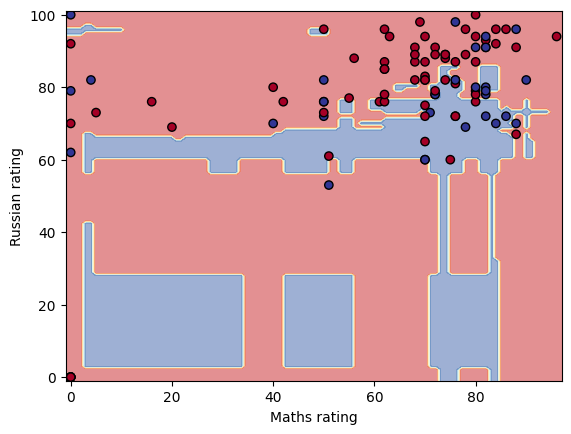

In [64]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

encoder = LabelEncoder()
encoded_gender = encoder.fit_transform(df_test_cut['Sex'])


data_reshaped = df_test_cut[independent_features].values.reshape(-1, len(independent_features))
disp = DecisionBoundaryDisplay.from_estimator(
    forest_model, data_reshaped, response_method="predict",
    xlabel=independent_features[0], ylabel=independent_features[1],
    alpha=0.5,
    cmap=plt.cm.RdYlBu
)
disp.ax_.scatter(data_reshaped[:, 0], data_reshaped[:, 1], c=encoded_gender, cmap=plt.cm.RdYlBu, edgecolor="k")

In [ ]:
# df_test_cut['Code'] = 'Предсказание верно'
# df_test_cut.loc[(df_test_cut['Sex']=='мужской') & (df_test_cut['Predicted']=='женский'), 'Code'] = 'лжеженщина'
# df_test_cut.loc[(df_test_cut['Sex']=='женский') & (df_test_cut['Predicted']=='мужской'), 'Code'] = 'лжемужчина'
# sns.scatterplot(data=df_test_cut, x='Growth', y='Weight', hue='Code')

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(df_test_cut[target_feature], df_test_cut['Predicted'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.5       , 0.83333333, 0.44871795, 0.        , 0.85714286,
        0.25      , 0.        ]),
 array([0.14285714, 0.2173913 , 0.97222222, 0.        , 0.66666667,
        0.07692308, 0.        ]),
 array([0.22222222, 0.34482759, 0.61403509, 0.        , 0.75      ,
        0.11764706, 0.        ]),
 array([ 7, 23, 36,  8,  9, 13,  2]))